# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
bookings = pd.read_csv('processed_hotel_bookings.csv')
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,-1.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data profile

In [3]:
#Using describe to inspect numeric columns
bookings.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,87389.0,0.274920,0.446477,0.00,0.0,0.0,1.0,1.0
lead_time,87389.0,79.897195,86.053274,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87389.0,2016.210313,0.686094,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87389.0,26.837760,13.674352,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87389.0,15.815698,8.835244,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87389.0,1.005321,1.031935,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87389.0,2.625548,2.053591,0.00,1.0,2.0,4.0,50.0
adults,87389.0,1.875842,0.626490,0.00,2.0,2.0,2.0,55.0
children,87389.0,0.138644,0.455888,0.00,0.0,0.0,0.0,10.0
babies,87389.0,0.010825,0.113601,0.00,0.0,0.0,0.0,10.0


In [4]:
#I'll be looking into outliers later. From describe() it looks like I'll have to check:
#lead_time, stays_in_week_nights, adults, previous_cancellations, previous_bookings_not_canceled, booking_changes, 
#days_in_waiting_list and adr

In [5]:
#let's see how the histograms of the numeric columns look like
numeric_cols = list(bookings.select_dtypes(include=[np.number]).columns)
print(numeric_cols)

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [6]:
#The agent column is simply showing numeric id's, not need to include it
numeric_cols.remove('agent')

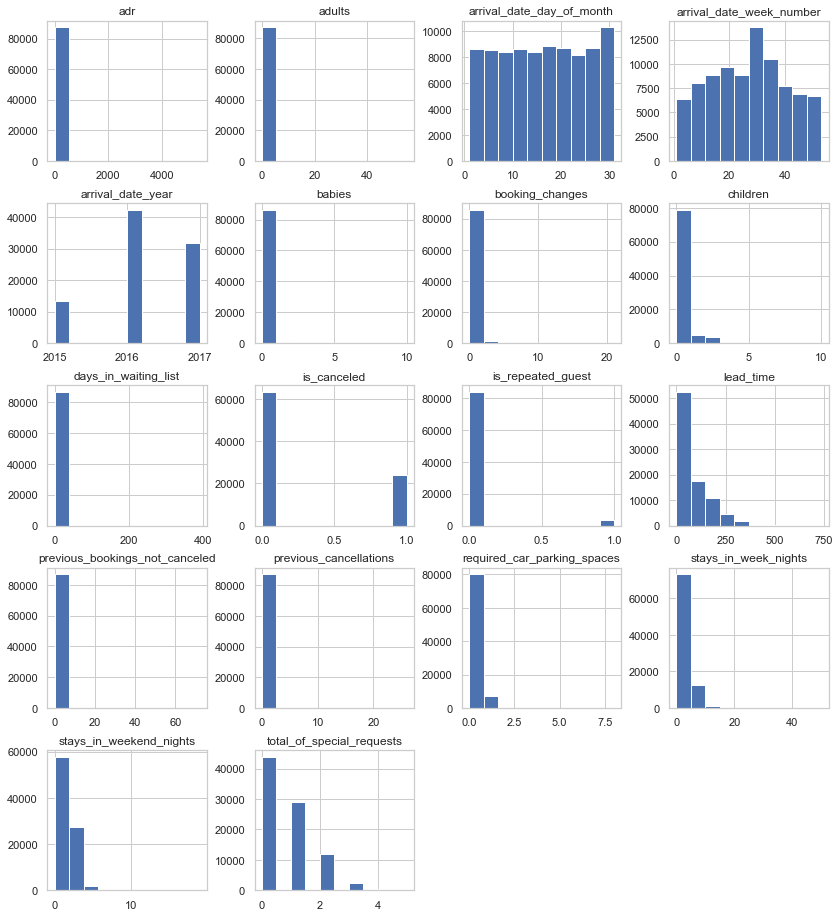

In [7]:
bookings[numeric_cols].hist(figsize=(14,16))
plt.show()

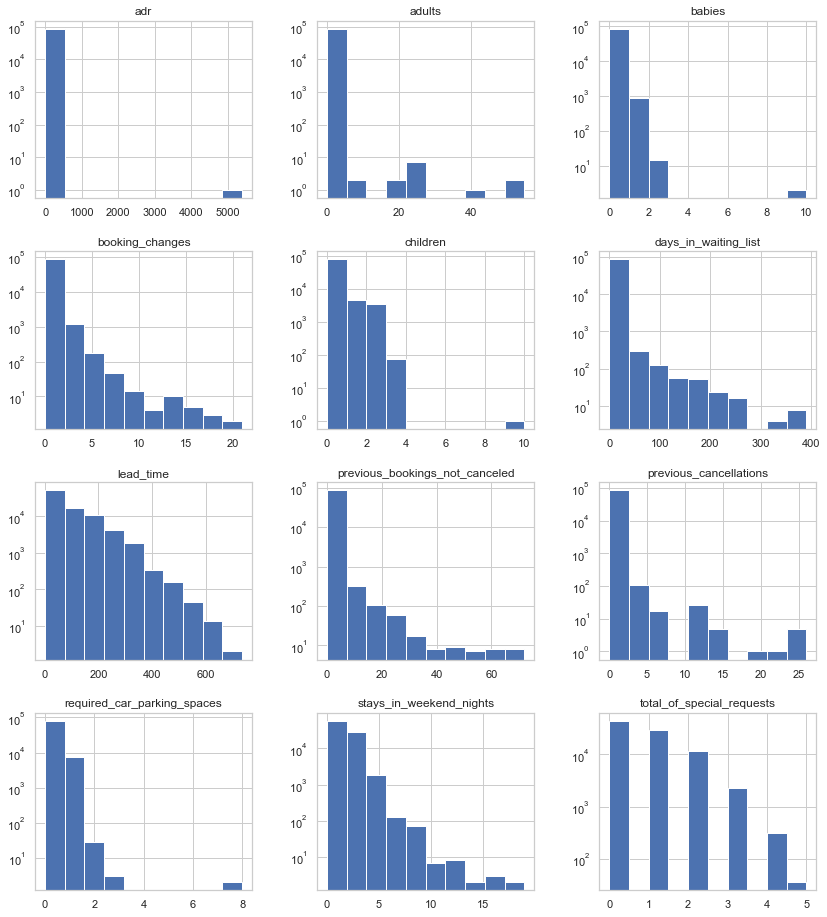

In [8]:
#Not getting a lot here, trying the log scale for the heavily skewed columns
bookings[['adr', 'adults', 'babies', 'booking_changes', 'children', 'days_in_waiting_list', 'lead_time', 'previous_bookings_not_canceled', 'previous_cancellations', 'required_car_parking_spaces', 'stays_in_weekend_nights', 'total_of_special_requests']].hist(log=True, figsize=(14,16))
plt.show()

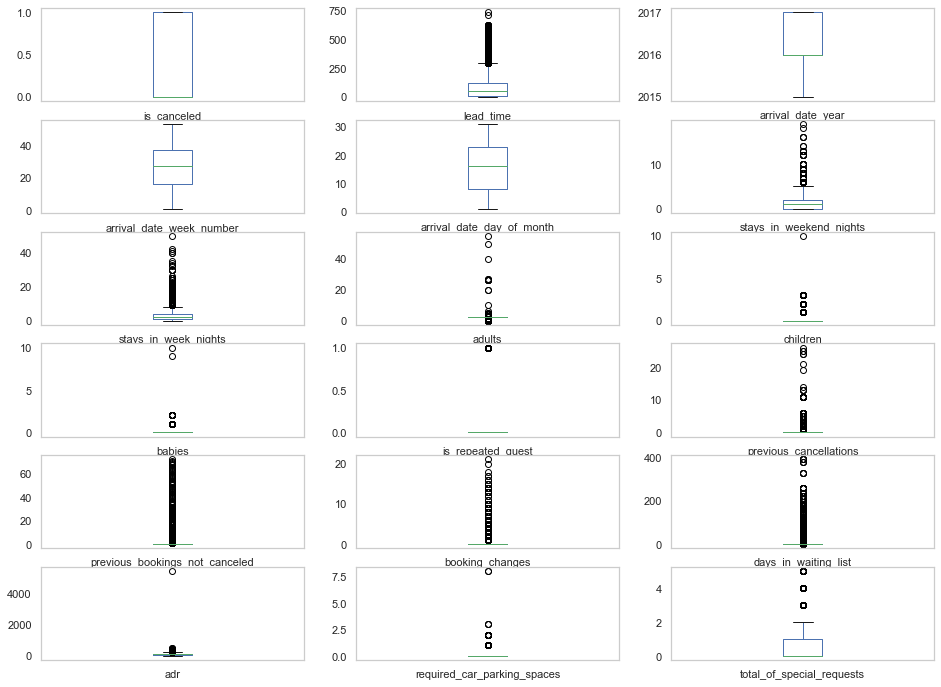

In [9]:
#Looking into outliers
bookings[numeric_cols].plot(kind='box', grid=False, subplots=True, layout=(6,3), figsize=(16,12))
plt.show()

Looks like I was on the right track and the columns to look into are:
lead_time, stays_in_week_nights, adults, previous_cancellations, previous_bookings_not_canceled, booking_changes, days_in_waiting_list and adr.

In [10]:
#Seeing how many of my observations contain a technical outlier
q1 = bookings.quantile(0.25)
q3 = bookings.quantile(0.75)
iqr = q3-q1
bookings[((bookings < (q1 - 1.5 * iqr))| (bookings > (q3 + 1.5 * iqr))).any(axis=1)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,-1.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,-1.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,-1.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
11,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,0,No Deposit,240.0,0,Transient,97.00,0,3,Check-Out,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87372,City Hotel,0,175,2017,August,35,31,1,3,1,...,0,No Deposit,42.0,0,Transient,82.35,0,1,Check-Out,2017-09-04
87375,City Hotel,0,165,2017,August,35,29,1,5,3,...,0,No Deposit,9.0,0,Transient,209.25,0,3,Check-Out,2017-09-04
87381,City Hotel,0,135,2017,August,35,30,2,4,3,...,0,No Deposit,7.0,0,Transient,209.00,0,0,Check-Out,2017-09-05
87385,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07


In [11]:
#That's more than half of my dataset. Probably need to look into columns individually

In [12]:
#Taking a look at lead_time. It seems like making reservations with more than 6 months in advance isn't that strange.
bookings[bookings['lead_time'] > bookings['lead_time'].quantile(0.75)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,-1.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,-1.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
22,Resort Hotel,0,127,2015,July,27,1,2,5,2,...,0,No Deposit,115.0,0,Contract,94.95,0,1,Check-Out,2015-07-01
78,Resort Hotel,1,368,2015,July,27,3,3,7,2,...,0,No Deposit,40.0,0,Contract,55.68,0,0,Canceled,2015-05-19
79,Resort Hotel,0,364,2015,July,27,3,3,7,2,...,0,No Deposit,40.0,0,Contract,55.68,0,0,Check-Out,2015-07-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87377,City Hotel,0,247,2017,August,35,31,1,3,2,...,0,No Deposit,42.0,0,Transient,86.85,0,0,Check-Out,2017-09-04
87380,City Hotel,0,188,2017,August,35,31,2,3,2,...,0,No Deposit,14.0,0,Transient,99.00,0,0,Check-Out,2017-09-05
87381,City Hotel,0,135,2017,August,35,30,2,4,3,...,0,No Deposit,7.0,0,Transient,209.00,0,0,Check-Out,2017-09-05
87382,City Hotel,0,164,2017,August,35,31,2,4,2,...,0,No Deposit,42.0,0,Transient,87.60,0,0,Check-Out,2017-09-06


In [23]:
# After exploring adr it looks like only two bookings have serious mistakes on them, one negative and one in the thousands
#for a single stay. Getting rid of them
bookings = bookings[~(bookings['adr']<0) & ~(bookings['adr']>510)]

In [25]:
#The other thing I wanted to check regaring adr was the reservations that have 0.0 for it. 
#Looking at market_segment shows that there is a 'Complementary' segment. Are all the 0.0 adr reservations complementary?
print(bookings['market_segment'].unique())

['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


In [26]:
bookings[bookings['adr']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
120,Resort Hotel,0,32,2015,July,27,4,0,1,4,...,2,No Deposit,-1.0,0,Transient,0.0,0,1,Check-Out,2015-07-05
1581,Resort Hotel,0,3,2015,September,37,10,0,1,1,...,0,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-09-11
2048,Resort Hotel,0,13,2015,October,41,7,0,2,2,...,0,No Deposit,-1.0,0,Transient,0.0,0,2,Check-Out,2015-10-09
2050,Resort Hotel,0,0,2015,October,41,7,0,1,3,...,1,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-10-08
2199,Resort Hotel,0,1,2015,October,42,16,0,1,1,...,0,No Deposit,-1.0,0,Transient,0.0,0,3,Check-Out,2015-10-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84242,City Hotel,0,85,2017,July,30,27,0,2,2,...,1,No Deposit,-1.0,0,Transient,0.0,0,1,Check-Out,2017-07-29
84321,City Hotel,0,4,2017,July,30,29,0,1,2,...,0,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2017-07-30
84420,City Hotel,0,0,2017,July,31,31,1,0,1,...,0,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2017-08-01
85787,City Hotel,0,1,2017,August,34,24,0,1,2,...,1,No Deposit,-1.0,0,Transient,0.0,0,3,Check-Out,2017-08-25


In [27]:
bookings[(bookings['adr']==0) & (bookings['market_segment']=='Complementary')] 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
120,Resort Hotel,0,32,2015,July,27,4,0,1,4,...,2,No Deposit,-1.0,0,Transient,0.0,0,1,Check-Out,2015-07-05
1581,Resort Hotel,0,3,2015,September,37,10,0,1,1,...,0,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-09-11
2048,Resort Hotel,0,13,2015,October,41,7,0,2,2,...,0,No Deposit,-1.0,0,Transient,0.0,0,2,Check-Out,2015-10-09
2050,Resort Hotel,0,0,2015,October,41,7,0,1,3,...,1,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-10-08
2199,Resort Hotel,0,1,2015,October,42,16,0,1,1,...,0,No Deposit,-1.0,0,Transient,0.0,0,3,Check-Out,2015-10-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84242,City Hotel,0,85,2017,July,30,27,0,2,2,...,1,No Deposit,-1.0,0,Transient,0.0,0,1,Check-Out,2017-07-29
84321,City Hotel,0,4,2017,July,30,29,0,1,2,...,0,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2017-07-30
84420,City Hotel,0,0,2017,July,31,31,1,0,1,...,0,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2017-08-01
85787,City Hotel,0,1,2017,August,34,24,0,1,2,...,1,No Deposit,-1.0,0,Transient,0.0,0,3,Check-Out,2017-08-25


In [28]:
#Looks like there isn't any good explanation for most of the zero adr reservtions. Dropping all the non Complementary
zero = bookings[(bookings['adr']==0) & (bookings['market_segment']!='Complementary')]
bookings = bookings.drop(zero.index).reset_index(drop=True)

In [29]:
bookings.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,86249.0,0.277360,0.447698,0.0,0.00,0.0,1.0,1.0
lead_time,86249.0,80.205162,85.841591,0.0,12.00,50.0,125.0,709.0
arrival_date_year,86249.0,2016.214576,0.684645,2015.0,2016.00,2016.0,2017.0,2017.0
arrival_date_week_number,86249.0,26.811963,13.652738,1.0,16.00,27.0,37.0,53.0
arrival_date_day_of_month,86249.0,15.819209,8.837256,1.0,8.00,16.0,23.0,31.0
stays_in_weekend_nights,86249.0,1.012429,1.027307,0.0,0.00,1.0,2.0,19.0
stays_in_week_nights,86249.0,2.643613,2.034963,0.0,1.00,2.0,4.0,50.0
adults,86249.0,1.877888,0.504501,0.0,2.00,2.0,2.0,4.0
children,86249.0,0.139538,0.457239,0.0,0.00,0.0,0.0,10.0
babies,86249.0,0.010899,0.114045,0.0,0.00,0.0,0.0,10.0


In [30]:
#The box plots showed that many outliers were on the higher end 
def top(column):
    return bookings[column].quantile(0.75) + ((bookings[column].quantile(0.75) - bookings[column].quantile(0.25))*1.5)

In [31]:
#Looks like someone actually stayed for two months at the resort
bookings[bookings['stays_in_week_nights']==bookings['stays_in_week_nights'].max()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
10687,Resort Hotel,0,126,2016,July,28,5,19,50,1,...,2,No Deposit,-1.0,0,Transient,110.0,0,3,Check-Out,2016-09-12


In [43]:
bookings['agent'][(bookings['previous_cancellations']!=0) & (bookings['agent']!=-1)]

10828    250.0
11025    240.0
11026    240.0
11174    314.0
11176    314.0
         ...  
61483     94.0
61484     94.0
61485     94.0
61486     94.0
63282      9.0
Name: agent, Length: 1020, dtype: float64

In [48]:
bookings[bookings['previous_cancellations'] > 1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
10601,Resort Hotel,0,4,2015,October,44,30,0,2,2,...,1,No Deposit,-1.0,0,Transient,40.0,1,2,Check-Out,2015-11-01
10602,Resort Hotel,0,0,2015,December,51,15,0,1,1,...,0,No Deposit,-1.0,0,Transient,35.0,0,2,Check-Out,2015-12-16
10603,Resort Hotel,0,1,2016,January,4,19,0,1,1,...,0,No Deposit,-1.0,0,Transient,30.0,0,2,Check-Out,2016-01-20
10604,Resort Hotel,0,0,2016,June,26,20,1,1,1,...,0,No Deposit,-1.0,0,Transient,63.0,1,2,Check-Out,2016-06-22
10605,Resort Hotel,0,1,2016,November,46,9,0,1,1,...,0,No Deposit,-1.0,0,Transient,30.0,1,2,Check-Out,2016-11-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65521,City Hotel,0,1,2017,July,28,12,0,1,1,...,0,No Deposit,-1.0,0,Transient,0.0,0,3,Check-Out,2017-07-13
65522,City Hotel,0,0,2017,August,31,1,0,1,1,...,0,No Deposit,-1.0,0,Transient,0.0,0,3,Check-Out,2017-08-02
65523,City Hotel,0,1,2017,August,32,8,0,1,1,...,1,No Deposit,-1.0,0,Transient,0.0,0,3,Check-Out,2017-08-09
65524,City Hotel,0,0,2017,August,33,15,0,1,1,...,0,No Deposit,-1.0,0,Transient,0.0,0,3,Check-Out,2017-08-16


I think the issue with previous_cancellations and previous_not_canceled is that these columns are recording a tally for 
travel agents or companies, based on the agent id column, that might have canceled more than once for different individuals. I don't think there's actually one person that has canceled his/her reservation up uo 26 times. If that's the case then these are
legitimate numbers and not errors.

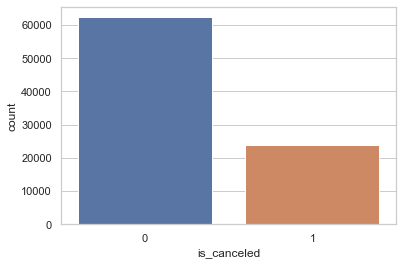

In [57]:
# Moving on to categorical variables
#Looking into the is_canceled column
sns.countplot(x='is_canceled', data=bookings)
plt.show()

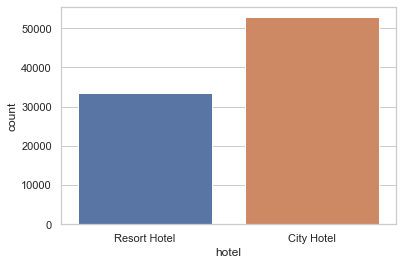

In [62]:
#Seeing how the reservations are split between city and resort
sns.countplot(x='hotel', data=bookings)
plt.show()

In [61]:
#Seeing how the cancelations are dsitributed across hotel types
bookings.groupby('hotel')['is_canceled'].sum()

hotel
City Hotel      15992
Resort Hotel     7930
Name: is_canceled, dtype: int64

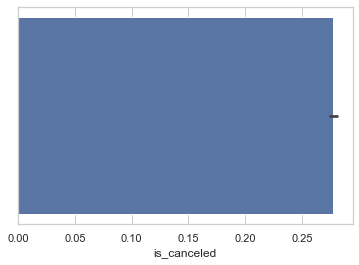

In [65]:
sns.barplot(x='is_canceled', hue='hotel', data=bookings)
plt.show()